In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
DATA_DIR = "/kaggle/input/food-101/food-101/food-101/images"

In [9]:
categories = os.listdir(DATA_DIR)
categories = [dir_ for dir_ in categories if dir_ !=".DS_Store"]
print(f"There are {len(categories)} categories of food")

There are 101 categories of food


In [10]:
import matplotlib.pyplot as plt
import glob
import os

In [11]:
def plot_random_image(category, axis = False, ax=None):
    directory = os.path.join(DATA_DIR, category)
    images = glob.glob(f"{directory}/*")
    random_int = np.random.randint(0, len(images)-1)
    random_image = images[random_int]
    img = plt.imread(random_image)
    ax.imshow(img)
    ax.set_title(category)
    ax.axis(axis)
                    

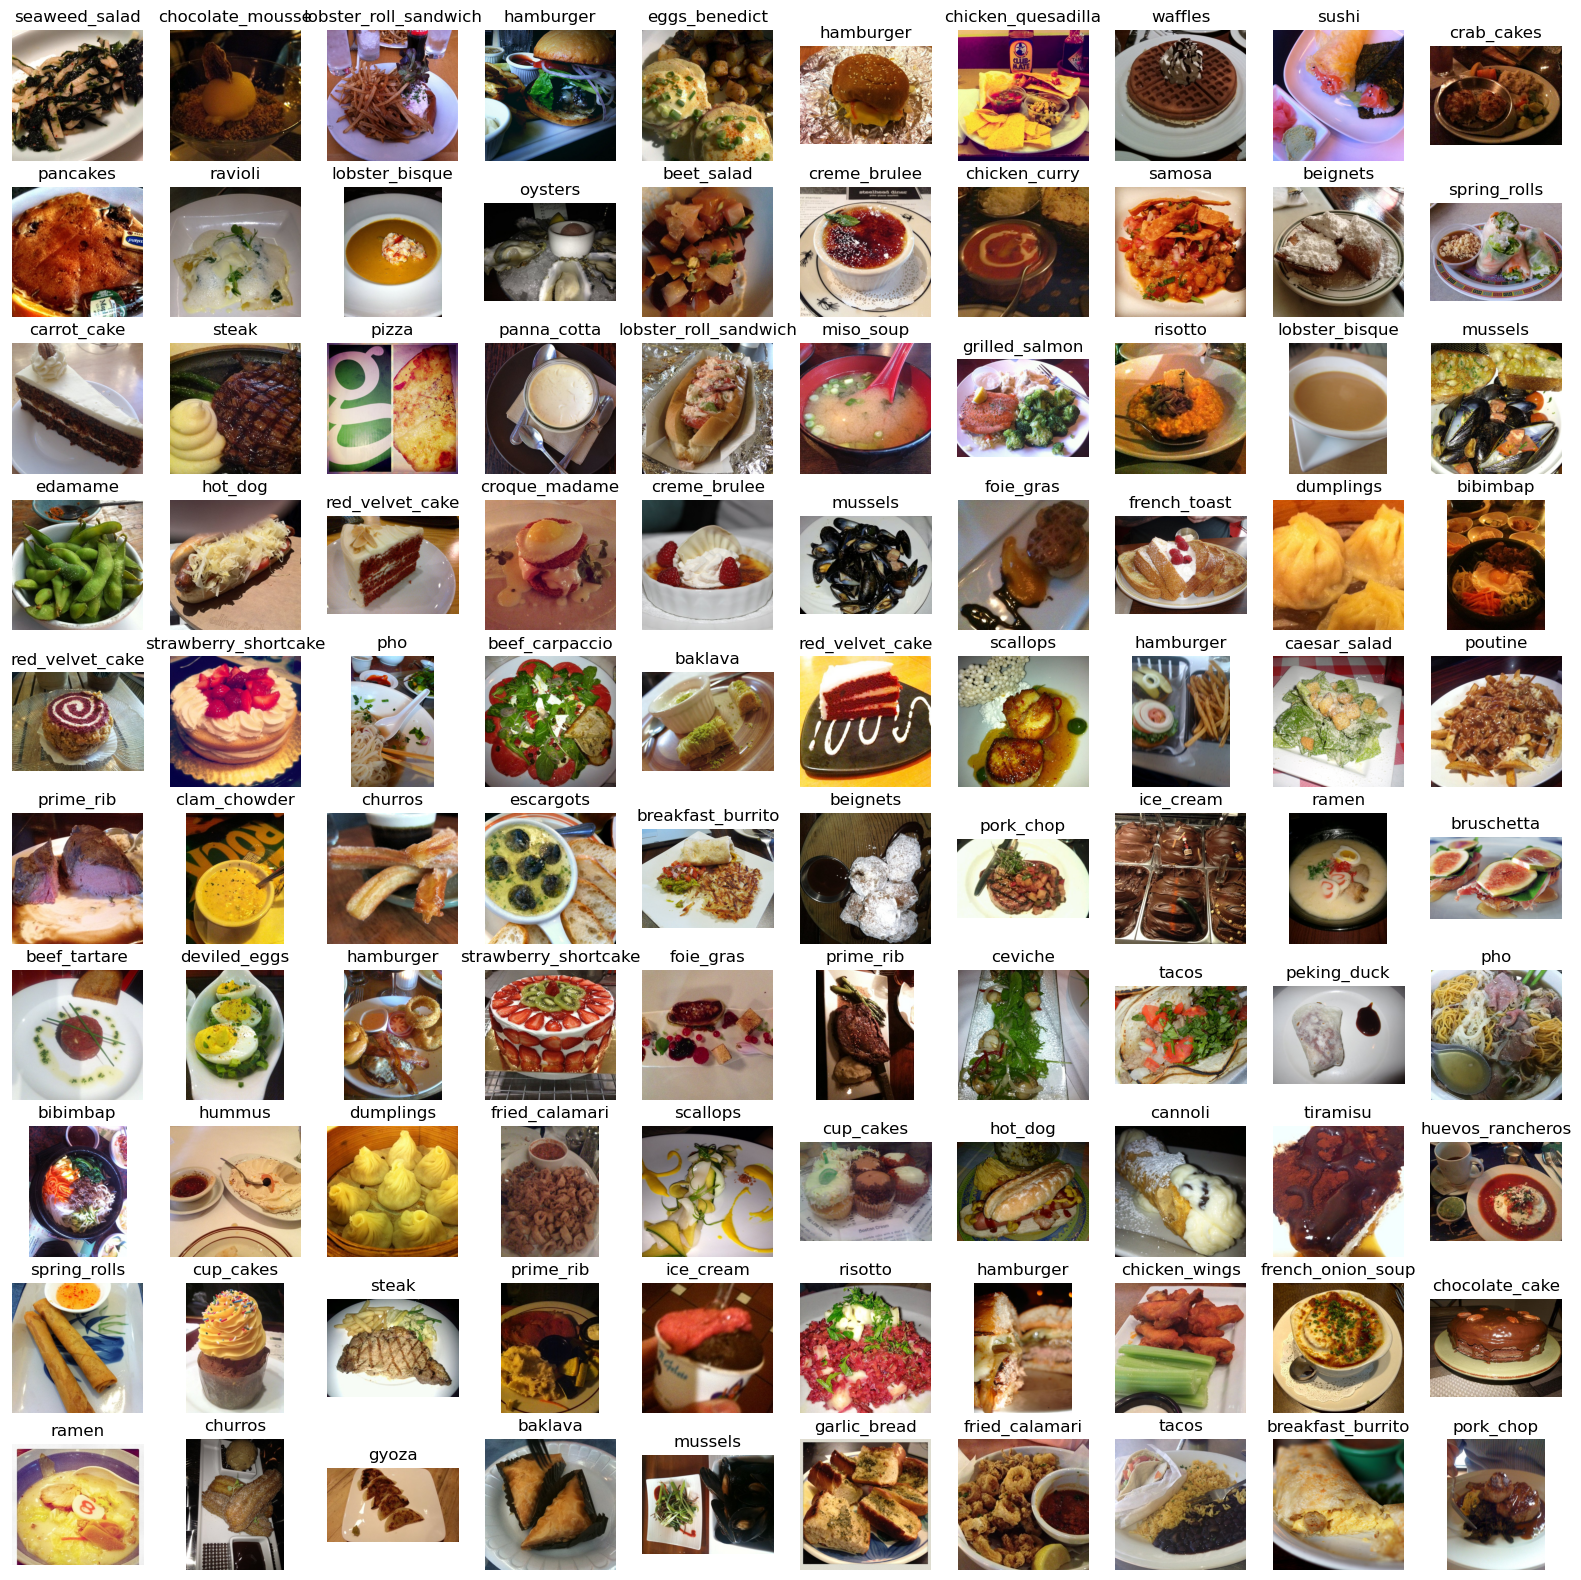

In [12]:
row = 10
col = 10
fig, axes = plt.subplots(row, col, figsize = (20, 20))
axes = axes.flatten()
for i, ax in enumerate(axes):
    print(f"Adding Image: {(i+1):>3d}/{row*col:>3d}", end = "\r")
    random_cat = np.random.choice(categories)
    plot_random_image(random_cat, ax = ax)
    
fig.show()

In [13]:
for cat in categories:
    print(f"There are {len(os.listdir(os.path.join(DATA_DIR, cat)))} images in {cat}")

There are 1000 images in macarons
There are 1000 images in french_toast
There are 1000 images in lobster_bisque
There are 1000 images in prime_rib
There are 1000 images in pork_chop
There are 1000 images in guacamole
There are 1000 images in baby_back_ribs
There are 1000 images in mussels
There are 1000 images in beef_carpaccio
There are 1000 images in poutine
There are 1000 images in hot_and_sour_soup
There are 1000 images in seaweed_salad
There are 1000 images in foie_gras
There are 1000 images in dumplings
There are 1000 images in peking_duck
There are 1000 images in takoyaki
There are 1000 images in bibimbap
There are 1000 images in falafel
There are 1000 images in pulled_pork_sandwich
There are 1000 images in lobster_roll_sandwich
There are 1000 images in carrot_cake
There are 1000 images in beet_salad
There are 1000 images in panna_cotta
There are 1000 images in donuts
There are 1000 images in red_velvet_cake
There are 1000 images in grilled_cheese_sandwich
There are 1000 images 

In [14]:
os.listdir('/kaggle/input/food-101/food-101/food-101/meta')

['test.txt',
 'train.json',
 'labels.txt',
 'test.json',
 'train.txt',
 'classes.txt']

In [15]:
!head '/kaggle/input/food-101/food-101/food-101/meta/train.txt'

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [16]:
!head '/kaggle/input/food-101/food-101/food-101/meta/test.txt'

apple_pie/1011328
apple_pie/101251
apple_pie/1034399
apple_pie/103801
apple_pie/1038694
apple_pie/1047447
apple_pie/1068632
apple_pie/110043
apple_pie/1106961
apple_pie/1113017


In [17]:
train_df = pd.read_csv('/kaggle/input/food-101/food-101/food-101/meta/train.txt', header = None, names=['path'])
train_df.head()

path
0  apple_pie/1005649
1  apple_pie/1014775
2  apple_pie/1026328
3  apple_pie/1028787
4  apple_pie/1043283

In [18]:
test_df = pd.read_csv('/kaggle/input/food-101/food-101/food-101/meta/test.txt', header = None, names=['path'])
test_df.head()

path
0  apple_pie/1011328
1   apple_pie/101251
2  apple_pie/1034399
3   apple_pie/103801
4  apple_pie/1038694

In [19]:
train_df.shape

(75750, 1)

In [20]:
test_df.shape

(25250, 1)

In [21]:
def spliter(data, class_or_id='id'):
    if class_or_id.upper() == 'CLASS':
        output = data.split('/')[0]
        
    else:
        output = data.split('/')[-1]
    return output

In [22]:
train_df['label'] = train_df['path'].map(lambda x: spliter(data = x, class_or_id = 'Class')) 
train_df.head()

path      label
0  apple_pie/1005649  apple_pie
1  apple_pie/1014775  apple_pie
2  apple_pie/1026328  apple_pie
3  apple_pie/1028787  apple_pie
4  apple_pie/1043283  apple_pie

In [23]:
train_df['idx'] = train_df['path'].map(lambda x: spliter(x)) 
train_df.head()

path      label      idx
0  apple_pie/1005649  apple_pie  1005649
1  apple_pie/1014775  apple_pie  1014775
2  apple_pie/1026328  apple_pie  1026328
3  apple_pie/1028787  apple_pie  1028787
4  apple_pie/1043283  apple_pie  1043283

In [24]:
test_df['label'] = test_df['path'].map(lambda x: spliter(x, 'class')) 
test_df['idx'] = test_df['path'].map(lambda x: spliter(x)) 
test_df.head()

path      label      idx
0  apple_pie/1011328  apple_pie  1011328
1   apple_pie/101251  apple_pie   101251
2  apple_pie/1034399  apple_pie  1034399
3   apple_pie/103801  apple_pie   103801
4  apple_pie/1038694  apple_pie  1038694

In [25]:
train_df['label'].value_counts()

apple_pie        750
miso_soup        750
peking_duck      750
panna_cotta      750
pancakes         750
                ... 
donuts           750
deviled_eggs     750
cup_cakes        750
croque_madame    750
waffles          750
Name: label, Length: 101, dtype: int64

In [26]:
def add_exact_path(path):
    return '/kaggle/input/food-101/food-101/food-101/images/'+path+'.jpg'

In [27]:
train_df['path'] = train_df[['path']].apply(add_exact_path, axis=1)
test_df['path'] = test_df[['path']].apply(add_exact_path, axis=1)
train_df.head()

path      label      idx
0  /kaggle/input/food-101/food-101/food-101/image...  apple_pie  1005649
1  /kaggle/input/food-101/food-101/food-101/image...  apple_pie  1014775
2  /kaggle/input/food-101/food-101/food-101/image...  apple_pie  1026328
3  /kaggle/input/food-101/food-101/food-101/image...  apple_pie  1028787
4  /kaggle/input/food-101/food-101/food-101/image...  apple_pie  1043283

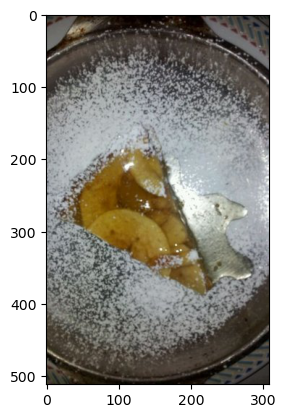

In [28]:
from matplotlib import pyplot as plt
img = plt.imread(train_df['path'].iloc[0])
plt.imshow(img)

In [29]:
train_copy = train_df.copy()
test_copy = test_df.copy()

In [30]:
# allowed_labels = ['beignets', 'pizza', 'beef_tartare', 'bread_pudding', 'breakfast_burrito', 'chocolate_cake', 'clam_chowder', 'crab_cakes', 'filet_mignon', 'dumplings']
allowed_labels = ['beignets', 'pizza', 'beef_tartare', 'chocolate_cake', 'clam_chowder']

In [31]:
test_df = test_df[test_df['label'].isin(allowed_labels)]
test_df['label'].value_counts()

beef_tartare      250
beignets          250
chocolate_cake    250
clam_chowder      250
pizza             250
Name: label, dtype: int64

In [32]:
train_df = train_df[train_df['label'].isin(allowed_labels)]
train_df['label'].value_counts()

beef_tartare      750
beignets          750
chocolate_cake    750
clam_chowder      750
pizza             750
Name: label, dtype: int64

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False, # randomly flip images
    zoom_range=[.8, 1],
    channel_shift_range=30,
    fill_mode='reflect',
    )
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [34]:
train_gen = datagen.flow_from_dataframe(dataframe = train_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 3750 validated image filenames belonging to 5 classes.


In [35]:
test_gen = test_datagen.flow_from_dataframe(dataframe = test_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 1250 validated image filenames belonging to 5 classes.


In [36]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception

In [37]:
#Test
from tensorflow.keras.applications.vgg19 import VGG19
pre_trained_model = VGG19(include_top = False,
                            weights = 'imagenet')
from tensorflow.keras.applications import ResNet152V2
pre_trained_model = ResNet152V2(include_top = False,
                            weights = 'imagenet')

from tensorflow.keras.applications import InceptionResNetV2
pre_trained_model = InceptionResNetV2(include_top = False,
                            weights = 'imagenet')

from tensorflow.keras.applications import DenseNet201
pre_trained_model = DenseNet201(include_top = False,
                            weights = 'imagenet')

74836368/74836368 [==============================] - 0s 0us/step


In [38]:
from tensorflow.keras.applications import ResNet152V2
pre_trained_model = ResNet152V2(include_top = False,
                            weights = 'imagenet')

In [39]:
# pre_trained_model = Xception(weights='imagenet', include_top=False)

In [40]:
def create_model(pre_trained_model):
    x = pre_trained_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256,activation='relu')(x)
    # x = Dropout(0.4)(x)
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.2)(x)

    predictions = Dense(5, activation='softmax')(x)

    model = Model(inputs=pre_trained_model.input, outputs=predictions)
    model.compile(optimizer=SGD(lr=0.0001, momentum = 0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

-------

In [41]:
#Test
# from tensorflow.keras.applications.vgg19 import VGG19
# pre_trained_model = VGG19(include_top = False,
#                             weights = 'imagenet')

# from tensorflow.keras.applications import ResNet152V2
# pre_trained_model = ResNet152V2(include_top = False,
#                             weights = 'imagenet')

# from tensorflow.keras.applications import InceptionResNetV2
# pre_trained_model = InceptionResNetV2(include_top = False,
#                             weights = 'imagenet')

# from tensorflow.keras.applications import DenseNet201
# pre_trained_model = DenseNet201(include_top = False,
#                             weights = 'imagenet')

In [42]:
# from tensorflow.keras.applications.vgg19 import VGG19
# pre_trained_model = VGG19(include_top = False,
#                             weights = 'imagenet')

# model = create_model(pre_trained_model)

In [43]:
# history1 = model.fit(train_gen,
#                     validation_data = test_gen,
#                     steps_per_epoch = len(train_gen) // 32,
#                     epochs=100,
#                     verbose=1)

In [44]:
import joblib
# joblib.dump(model, 'model_VGG.pkl')

In [46]:
import joblib
# joblib.dump(model, 'model_VGG.pkl')
from tensorflow.keras.applications import InceptionResNetV2
pre_trained_model = InceptionResNetV2(include_top = False,
                            weights = 'imagenet')

model = create_model(pre_trained_model)
history3 = model.fit(train_gen,
                    validation_data = test_gen,
                    steps_per_epoch = len(train_gen) // 32,
                    epochs=20,
                    verbose=1)
# joblib.dump(model, 'model_IRN.pkl')

Epoch 1/20
3/3 [==============================] - 57s 7s/step - loss: 1.6586 - accuracy: 0.1875 - val_loss: 1.5231 - val_accuracy: 0.3528
Epoch 2/20
3/3 [==============================] - 11s 5s/step - loss: 1.5369 - accuracy: 0.3542 - val_loss: 1.2929 - val_accuracy: 0.6376
Epoch 3/20
3/3 [==============================] - 11s 5s/step - loss: 1.4164 - accuracy: 0.5208 - val_loss: 1.1519 - val_accuracy: 0.5464
Epoch 4/20
3/3 [==============================] - 11s 5s/step - loss: 1.2746 - accuracy: 0.6146 - val_loss: 0.9389 - val_accuracy: 0.6568
Epoch 5/20
3/3 [==============================] - 11s 5s/step - loss: 1.0352 - accuracy: 0.7500 - val_loss: 0.7359 - val_accuracy: 0.7344
Epoch 6/20
3/3 [==============================] - 11s 5s/step - loss: 0.9105 - accuracy: 0.7604 - val_loss: 0.6587 - val_accuracy: 0.7656
Epoch 7/20
3/3 [==============================] - 11s 5s/step - loss: 0.8088 - accuracy: 0.7188 - val_loss: 0.4926 - val_accuracy: 0.8488
Epoch 8/20
3/3 [==================

In [49]:
! ls -al /kaggle/working/

total 16
drwxr-xr-x 3 root root 4096 May 11 07:04 .
drwxr-xr-x 5 root root 4096 May 11 07:04 ..
drwxr-xr-x 2 root root 4096 May 11 07:04 .virtual_documents
---------- 1 root root  263 May 11 07:04 __notebook_source__.ipynb


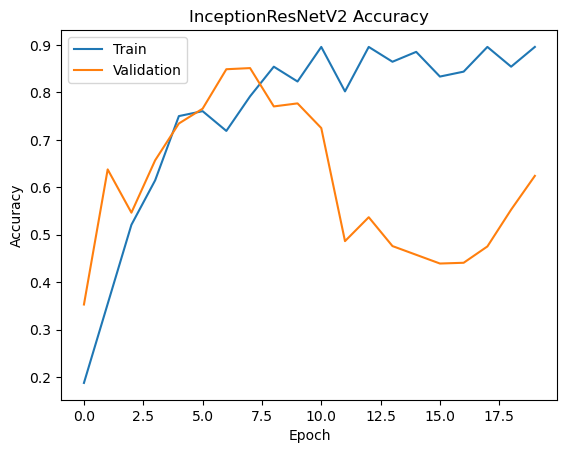

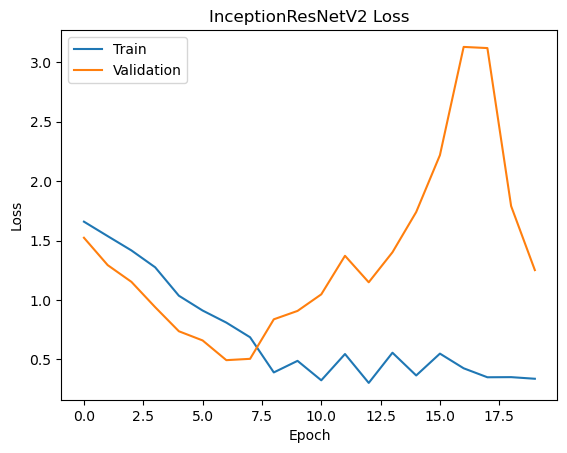

In [51]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('InceptionResNetV2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the losses
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('InceptionResNetV2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()